# PRCP-1000-ProtugeseBank

## Target
   
The classification goal is to predict a model which will help the bank marketing team to know
which customer will buy the product(subscribe a term deposit(y)) yes/no.

* Importing required libraries
* Reading csv(comma separated value) file
* Basic checks

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("data/bank-additional/bank-additional-full.csv", sep=";")  #import dataset
df
#campaign is no.of times bank contacted(call) people

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### o/p is categorical so, it can be concluded as a classification problem

In [ ]:
#find the no. of rows and columns
df.shape
# dataset has 41188 rows/records and 21 columns

(41188, 21)

There are 41,188 observations in this dataset. Each represents an existing customer that the bank reached via phone calls

In [ ]:
#list out the column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

0    36548
1     4640
Name: y, dtype: int64


<AxesSubplot:xlabel='y', ylabel='count'>

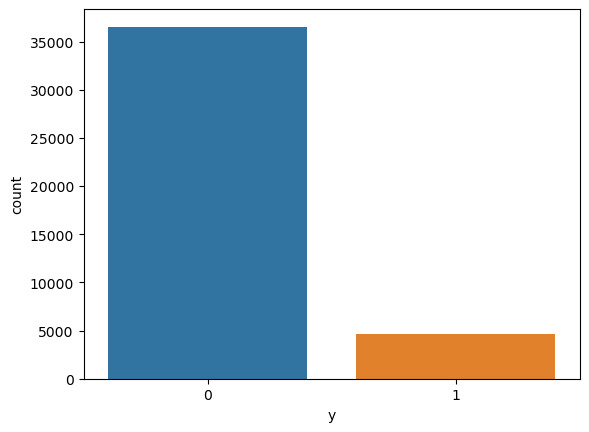

In [ ]:
print(df['y'].value_counts()) #imbalanced dataset #yes means subscribd to term deposit
sns.countplot(df.y) # proportion of subscribed and unsubscribed to the term deposit

* 4640 clients are subscribed to the term deposit

In [ ]:
for column in df.columns:
    print(column, df[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [ ]:
#categorical features with unique values
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


# Basic checks

In [ ]:
df.head()   #pdays 999 means client was not previously contacted

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
#check df structure which contains basic info related to data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#describe no. of numerical features(statistical info of only numerical data)
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


no column hvng std 0 so, no need to drop any column

In [ ]:
 df.describe(include = 'O')  #these are categorical features

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


* Although "duration" feature highly affects the output target, this value is not known before a call is performed. Hence, this feature should been discarded from the list of features to predict.
* pdays is having more unknown values, mentioned as 999, so drop this feature aswell

In [ ]:
df.drop(['duration','day_of_week','pdays'],axis=1,inplace=True)

In [ ]:
# selecting numerical and categorical columns
df1 = df.select_dtypes(include =[np.number]).columns
df2 =df.select_dtypes(include =[np.object]).columns

In [ ]:
print(df1)
print(df2)

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


#### EDA : to get insights of data
    * Univariate analysis
        - Histogram(continuous data)
        - Barplot(categorical data)
        - Normality check
    * Bivariate analysis
        - Barplot

In [ ]:
len(df.job.unique())

12

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df2 = df[['job', 'marital', 'education','default', 'housing', 'loan','contact','month','poutcome']]
df2.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,nonexistent


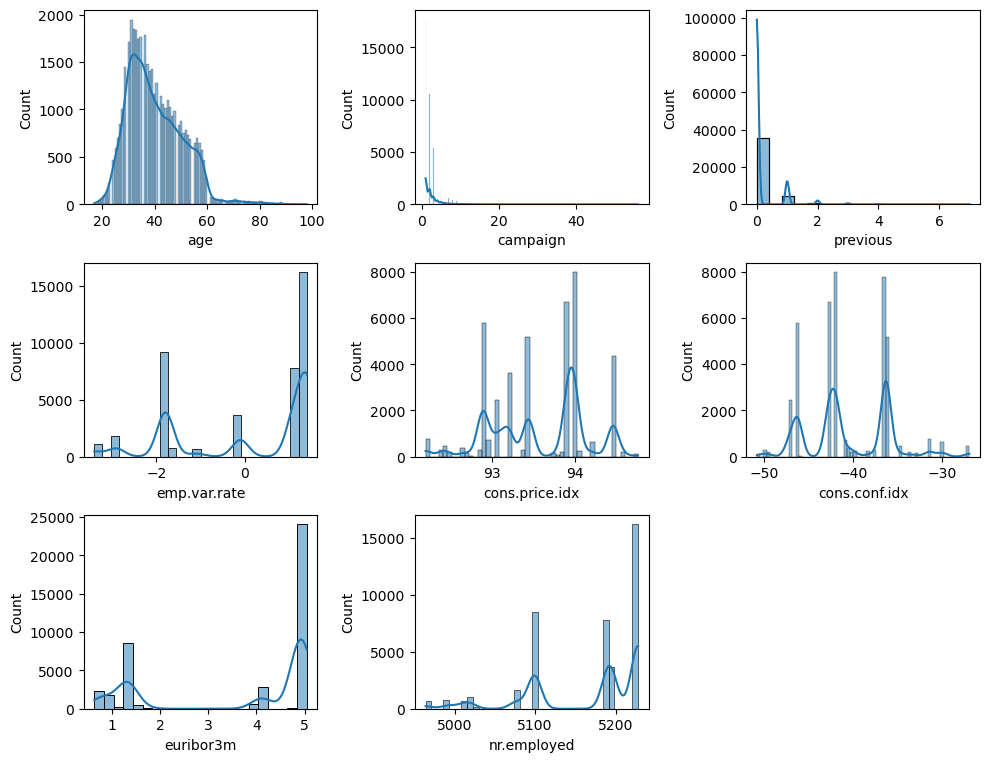

In [ ]:
plt.figure(figsize=(10,30))
plotnumber=1

for i in df1:
    plt.subplot(12,3, plotnumber)
    sns.histplot(df[i], kde= True)
    plotnumber+=1

plt.tight_layout()

### Insights from univariant analysis for continuous data
* clients called by the bank have an extensive age range, from 18 to 95 years old. However, a majority(1900) of customers called is in the age of 30s and 40s
* previous: for 3800 clients, number of contacts performed before this campaign 0 to 1 times
* emp.var.rate : about 15000 customers, employment variation rate distribution is 2%
* cons.price.idx : consumer price index is high at 94
* euribor3m : euribor 3 month rate is 5

Next we will see the exploratory analysis of the categorical variables, what are the categories and are there any missing values for these categories. Here, we will use the seaborn package to create the bar graphs below.

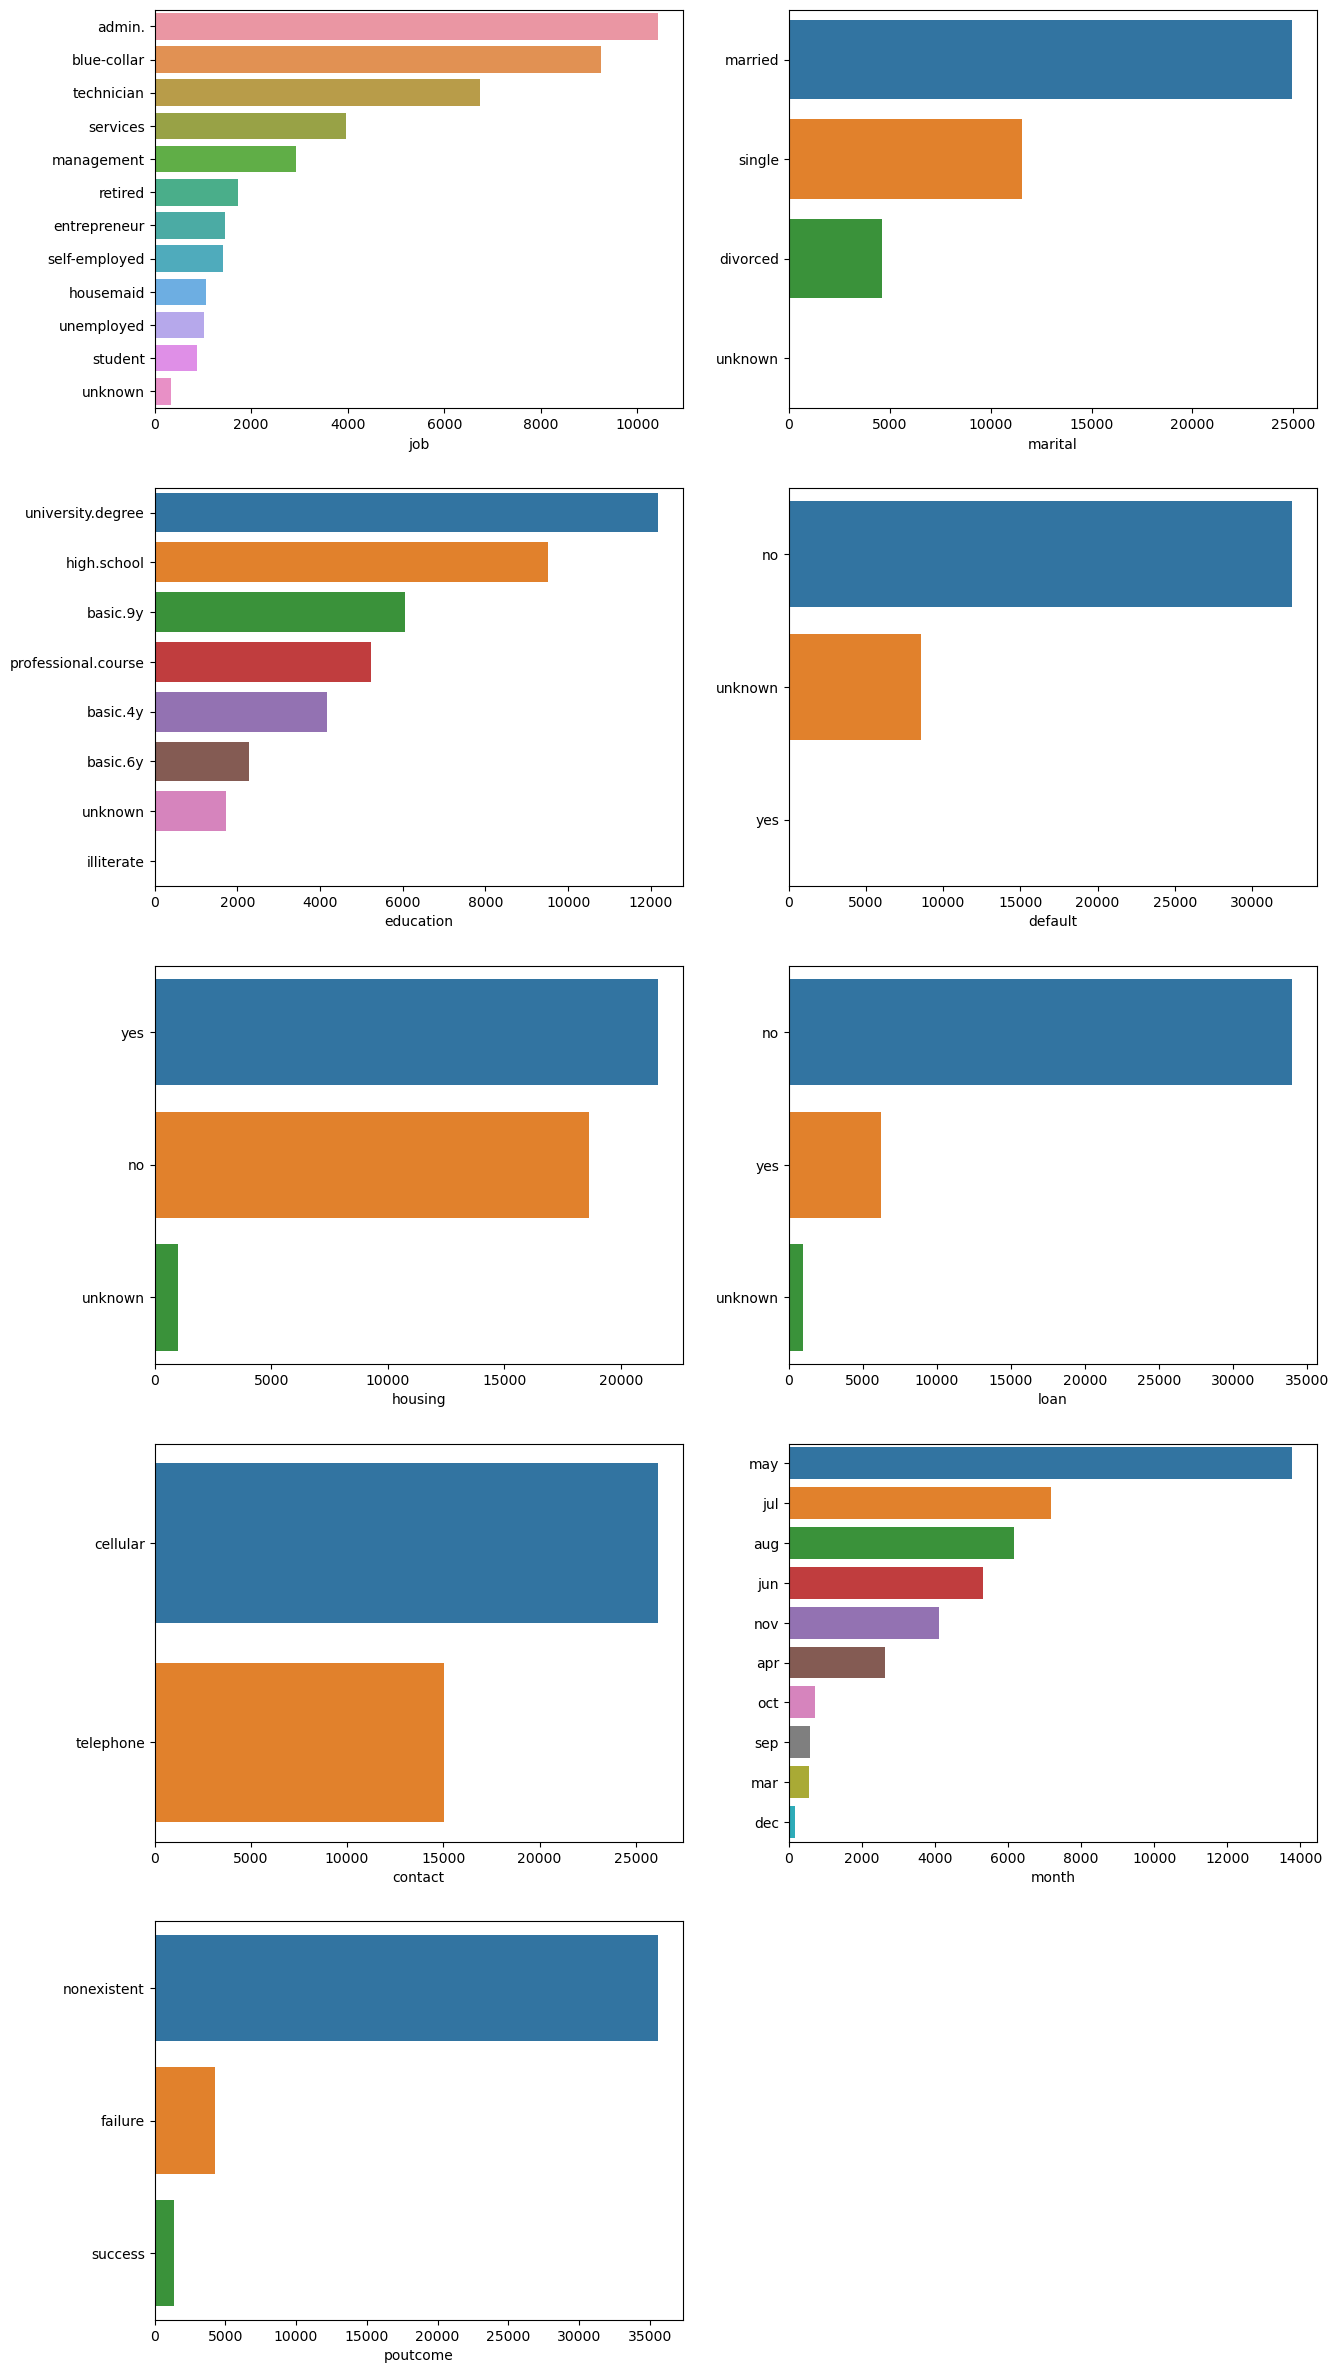

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,30), facecolor='white')
plotnumber=1

for i in df2:
    plt.subplot(5,2, plotnumber)
    sns.barplot(df2[i].value_counts(),df2[i].value_counts().index, data=df)
    plotnumber+=1
plt.show()
plt.tight_layout()

# Suggestions to the Bank market team to make customers buy the product.
### Insights from univariant analysis for categorical data
* client with job type as admin records are high in depositing or subscribed to term deposit in the given dataset and housemaid are very less, so have to target more on admin and bluecollar.
* clients who married are high in records, so next time should give preference to them.
* client who have university degree are in more count. Degree people of course are high salaried and university degree expected. And the illiterate count is very less.
* most clients have no credit default ,which means they can be approached.
* clients who have taken housing loan rate is more, so give more importance to people who have taken housing loan.
* clients who have taken personal loan are less in rate, so give more importance to people who have not taken any personal loan
* clients with cellular contact rate is more compared to telephone contact rate
* The highest contact rate happened in May, while the contact rate is closer to 0 in December.
* outcome of the previous marketing campaign- Success rate is small , nonexistent rate is high.


## Bivariate analysis

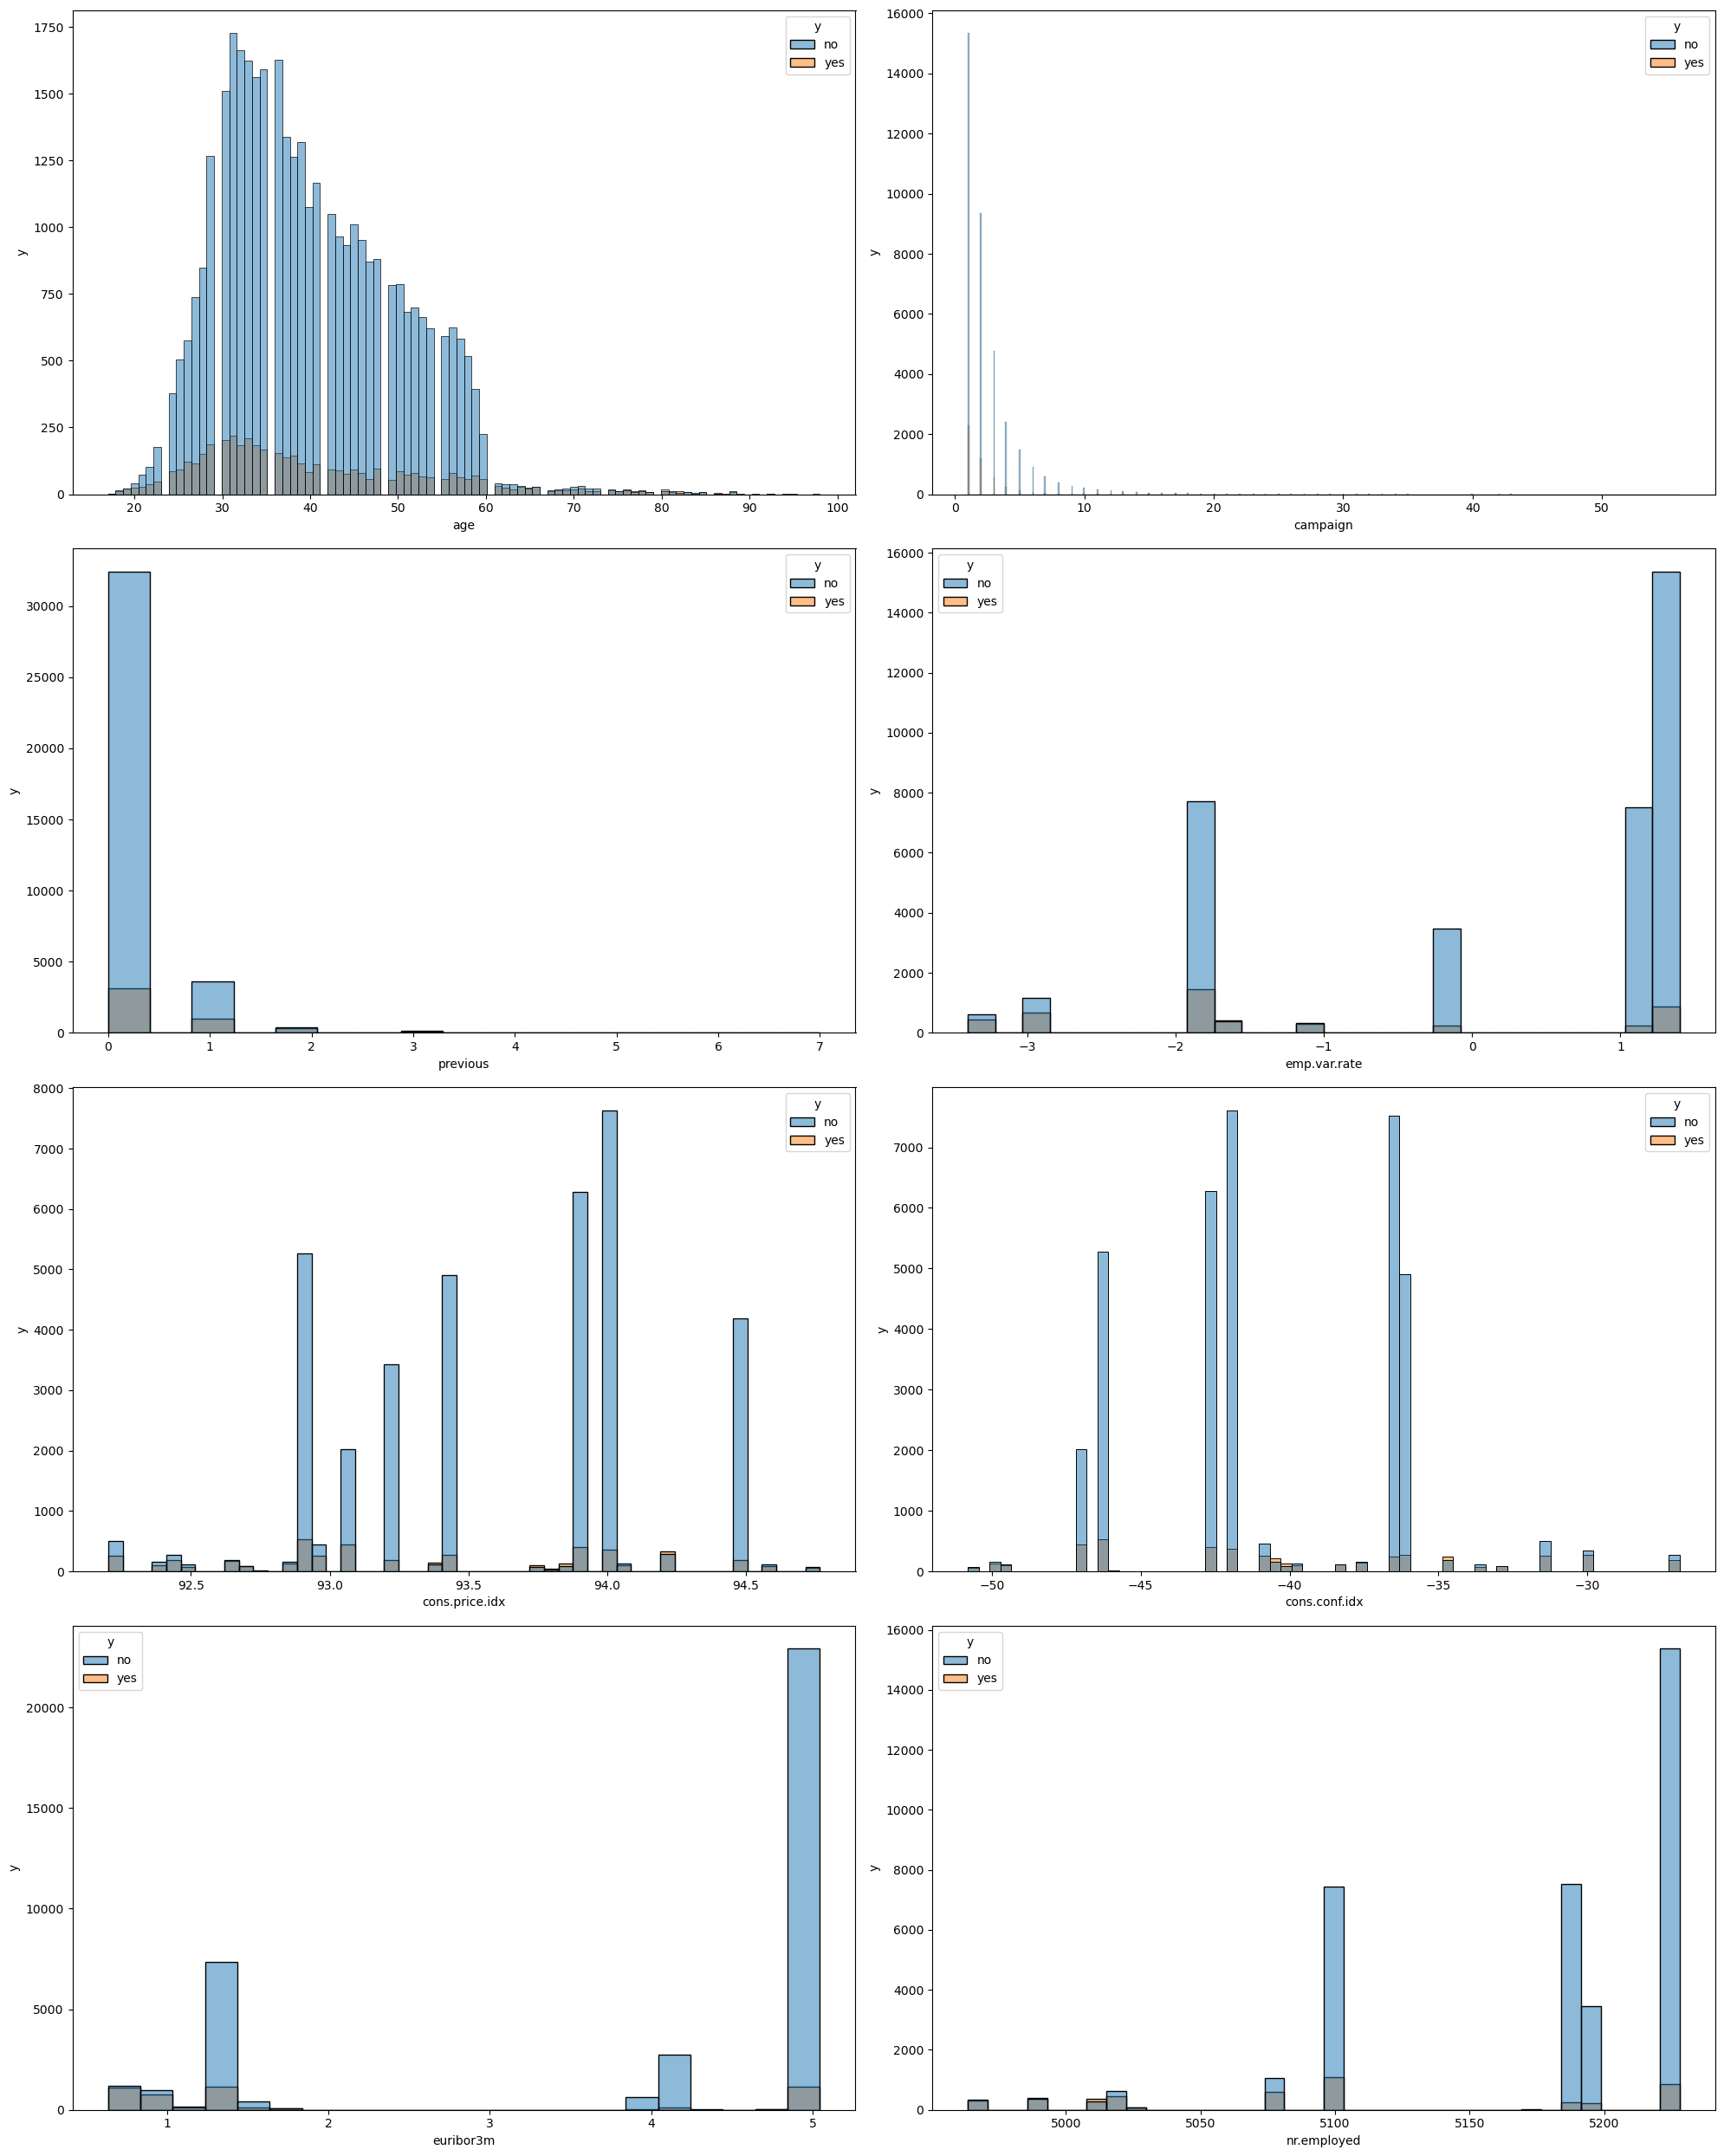

In [ ]:
plt.figure(figsize=(20,25))
plotnumber=1

for i in df1:
    plt.subplot(4,2, plotnumber)
    sns.histplot(x=df[i] ,hue=df.y)
    plt.xlabel(i, fontsize=10)
    plt.ylabel('y', fontsize=10)
    plotnumber+=1

plt.tight_layout()

* age : about 250 clients have subscribed and not subscribed to term deposit in the age range 30 to 40

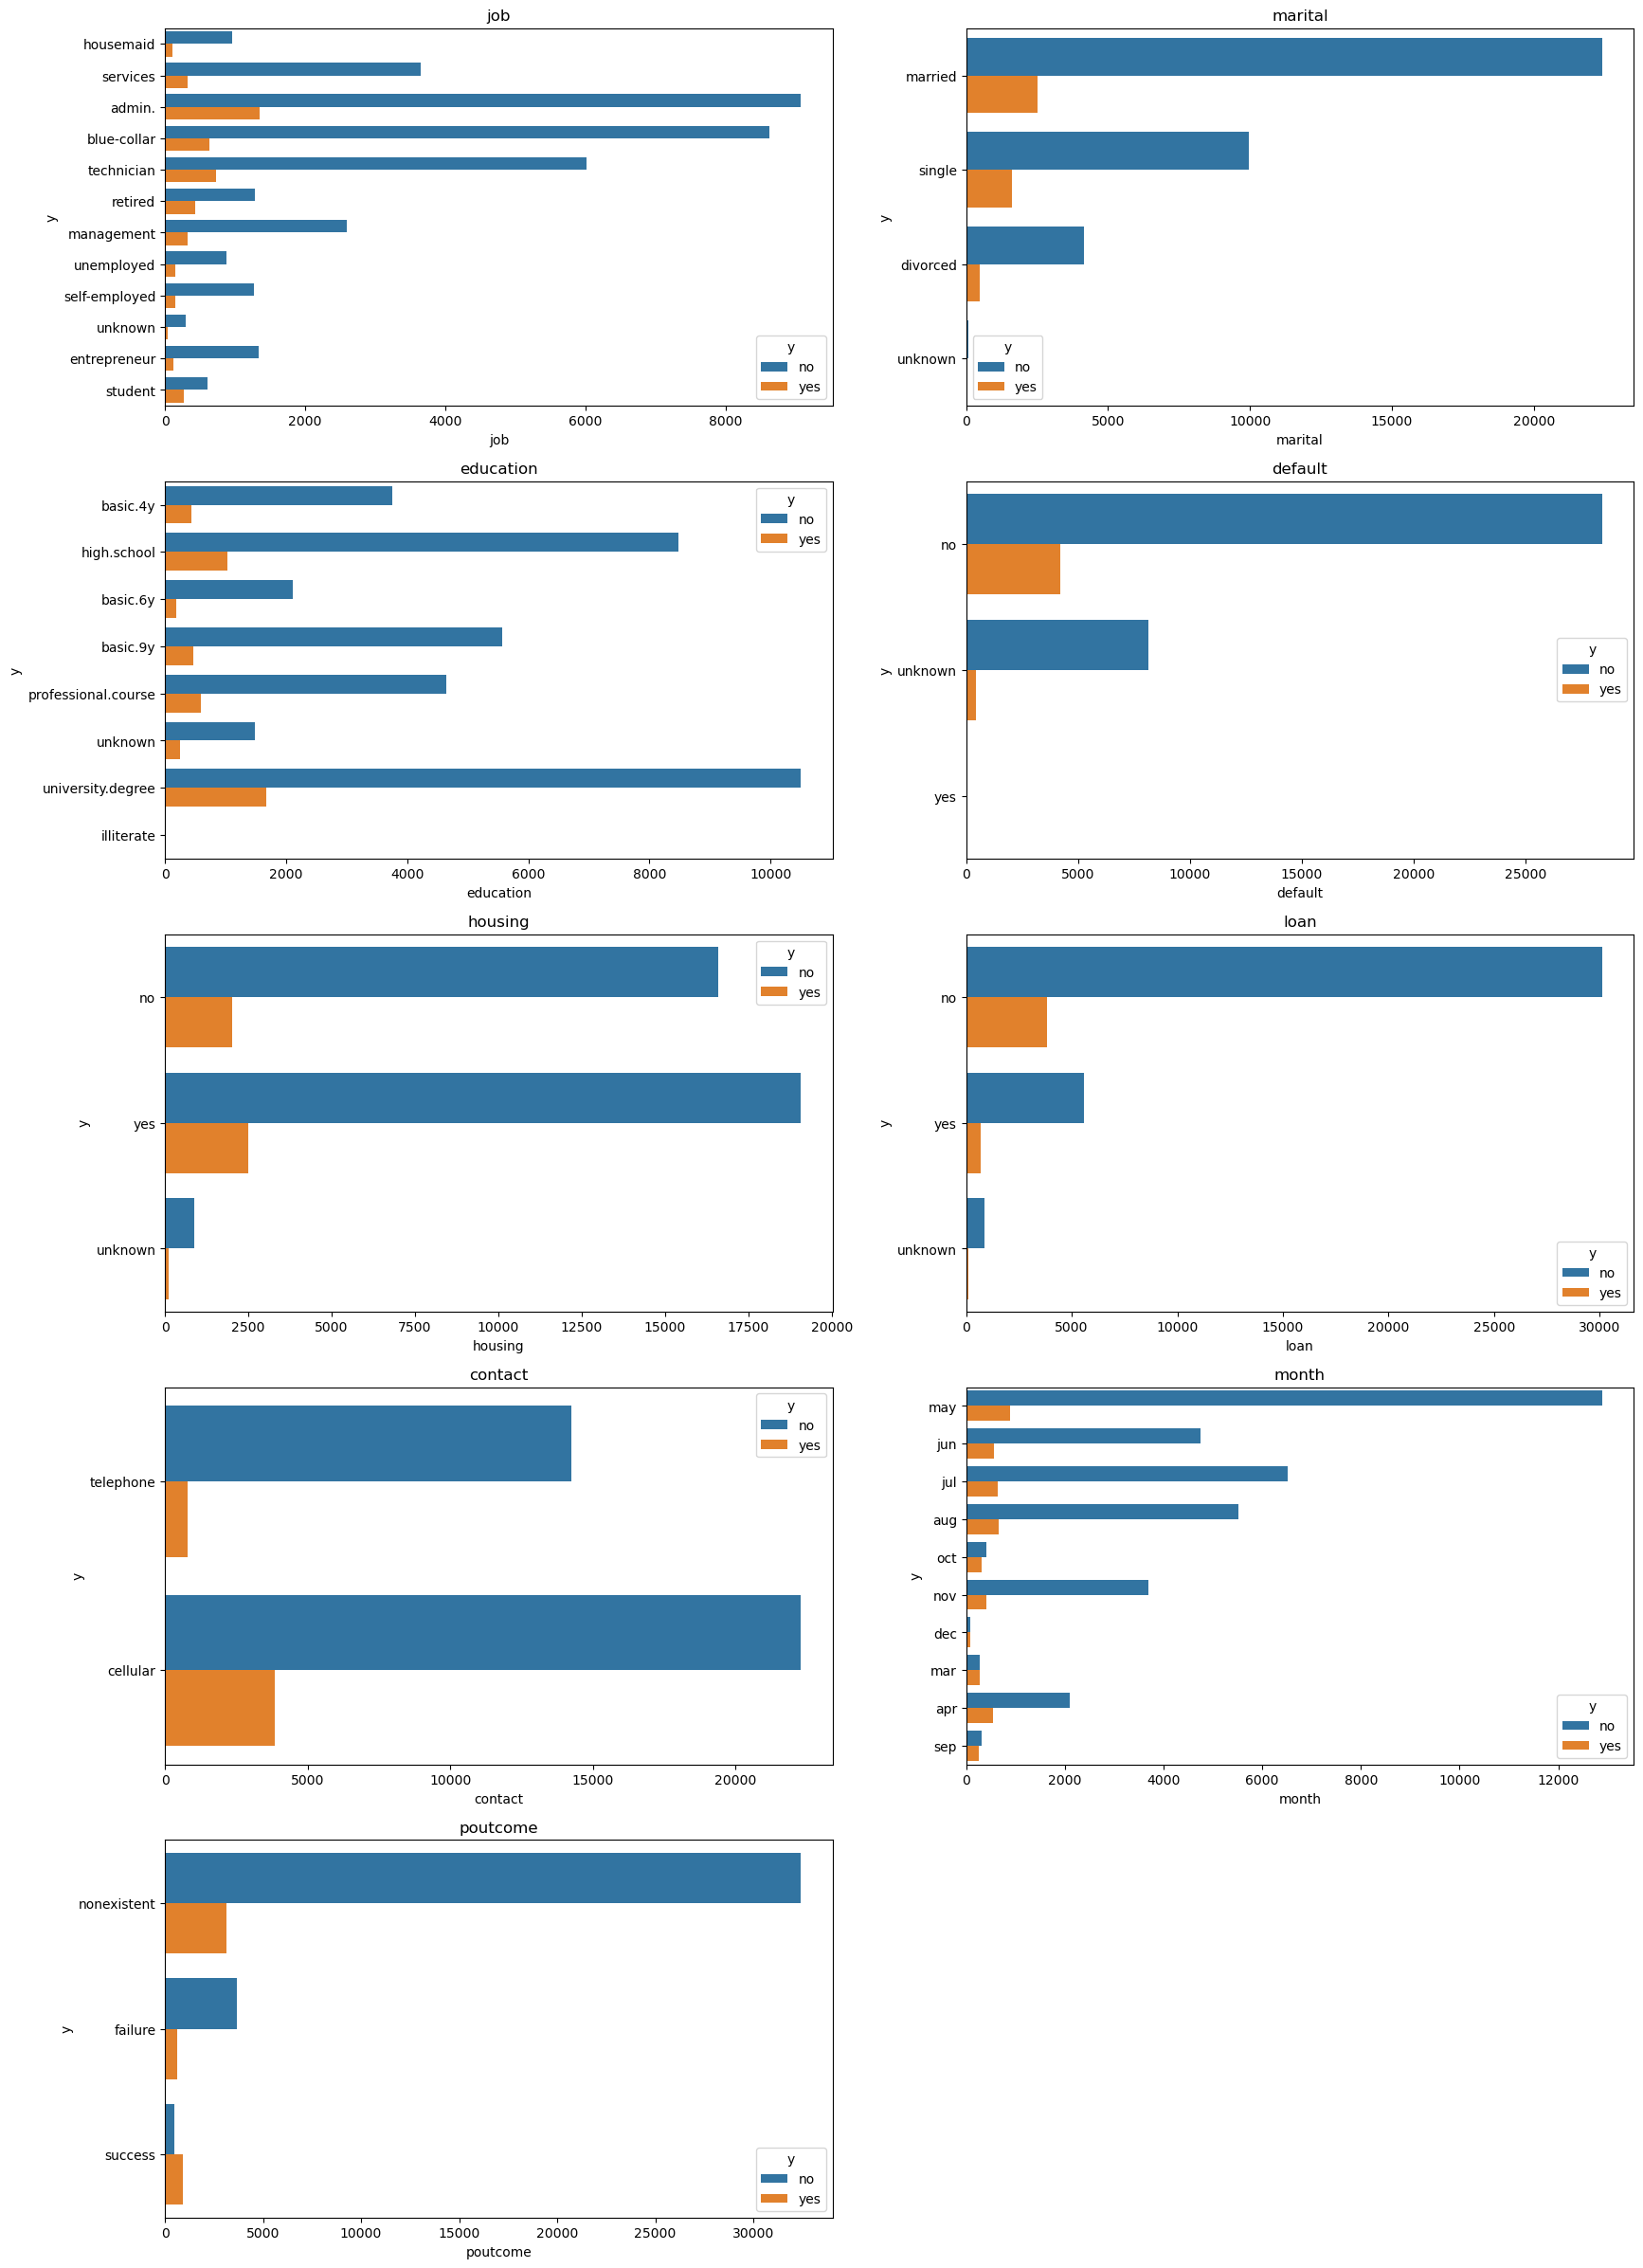

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for i in df2:
    plt.subplot(5,2, plotnumber)
    sns.countplot(y=df[i], hue = df.y)
    plt.title(i)
    plt.xlabel(i,fontsize=10)
    plt.ylabel('y', fontsize=10)
    plotnumber+=1
plt.show()
plt.tight_layout()

# Suggestions to the Bank market team to make customers buy the product.
### Insights from bivariant analysis
* client with job status admin is more subscribed to a term deposit, so next time contact them more
* clients who are married have more applied for a term deposit
* client who have housing loan have applied for term deposits
* client who didn't take personal loan have appiled to the term deposit
* client with cellular contact have subscribed more to term deposit, so bank should concentrate more on them
* In month May, July, Aug people have applied more to a term deposit


# Data Preprocessing

    * Check for null values and missing values
    * Converting categorical data to numerical data
    * Handling with outliers

In [ ]:
# find missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* no null values present, but missing values are present in job, education, housing, loan features so inferring them.

In [ ]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    education=list(df[f2].unique())
    dataframes=[]
    for e in education:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    c=pd.concat(dataframes,axis=1)
    c.columns=education
    c=c.fillna(0)
    return c

In [ ]:
cross_tab(df, 'job', 'education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [ ]:
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

From the cross-tabulation we are inferring unknown values of job and education,
* Inferring education from jobs: it can be seen that clients with management and admin jobs usually have a university degree. Hence, wherever 'job' = management, admin and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' then 'education' = 'high.school' and 'job' = 'housemaid' then 'education' = 'basic.4y'.

* Inferring jobs from education: If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar' and 'education' = 'professional.course', then the 'job' = 'technician'.

* Inferring jobs from age: as we can see if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values

In [ ]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='admin.'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [ ]:
cross_tab(df, 'job', 'education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,0.0,6002,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


As we can see, we are able to reduce the number of unknowns and enhance our data set.

* Imputations for house and loan: We are again using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.' Our hypothesis is that housing loan status (Yes or No) should be in the proportion of each job category. Hence using the prior known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable.

In [ ]:
cross_tab(df,'job','loan')

,no,yes,unknown
job,,,
admin.,8485,1710,227
blue-collar,7730,1384,241
entrepreneur,1214,206,36
housemaid,877,154,29
management,2414,439,71
retired,1452,245,44
self-employed,1186,195,40
services,3267,601,101
student,710,142,23


In [ ]:
jobhousing=cross_tab(df,'job','housing')

In [ ]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df


In [ ]:
df=fillhousing(df,jobhousing)

In [ ]:
cross_tab(df,'job','housing')

,no,yes,unknown
job,,,
admin.,4747,5675,0.0
blue-collar,4468,4887,0.0
entrepreneur,652,804,0.0
housemaid,504,556,0.0
management,1395,1529,0.0
retired,811,930,0.0
self-employed,658,763,0.0
services,1862,2107,0.0
student,396,479,0.0


In [ ]:
jobloan=cross_tab(df,'job','loan')

In [ ]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [ ]:
df=fillloan(df,jobloan)

In [ ]:
cross_tab(df,'job','loan')

,no,yes,unknown
job,,,
admin.,8679,1743,0.0
blue-collar,7938,1417,0.0
entrepreneur,1243,213,0.0
housemaid,901,159,0.0
management,2472,452,0.0
retired,1489,252,0.0
self-employed,1224,197,0.0
services,3344,625,0.0
student,733,142,0.0


### Encoding

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.contact = le.fit_transform(df.contact)
df.poutcome = le.fit_transform(df.poutcome)
df.y = le.fit_transform(df.y)

In [ ]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
df.job.nunique()

12

In [ ]:
Df1=pd.get_dummies(df['job'],drop_first=True)
df=pd.concat([df,Df1],axis=1).drop(['job'],axis=1)
Df1=pd.get_dummies(df['education'],drop_first=True)
df=pd.concat([df,Df1],axis=1).drop(['education'],axis=1)
Df1=pd.get_dummies(df['marital'],drop_first=True)
df=pd.concat([df,Df1],axis=1).drop(['marital'],axis=1)
Df1=pd.get_dummies(df['month'],drop_first=True)
df=pd.concat([df,Df1],axis=1).drop(['month'],axis=1)

In [ ]:
df.head()

,age,default,housing,loan,contact,campaign,previous,poutcome,emp.var.rate,cons.price.idx,...,unknown,aug,dec,jul,jun,mar,may,nov,oct,sep
0,56,0,0,0,1,1,0,1,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0
1,57,1,0,0,1,1,0,1,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0
2,37,0,2,0,1,1,0,1,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0
3,40,0,0,0,1,1,0,1,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0
4,56,0,0,2,1,1,0,1,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.shape

(41188, 44)

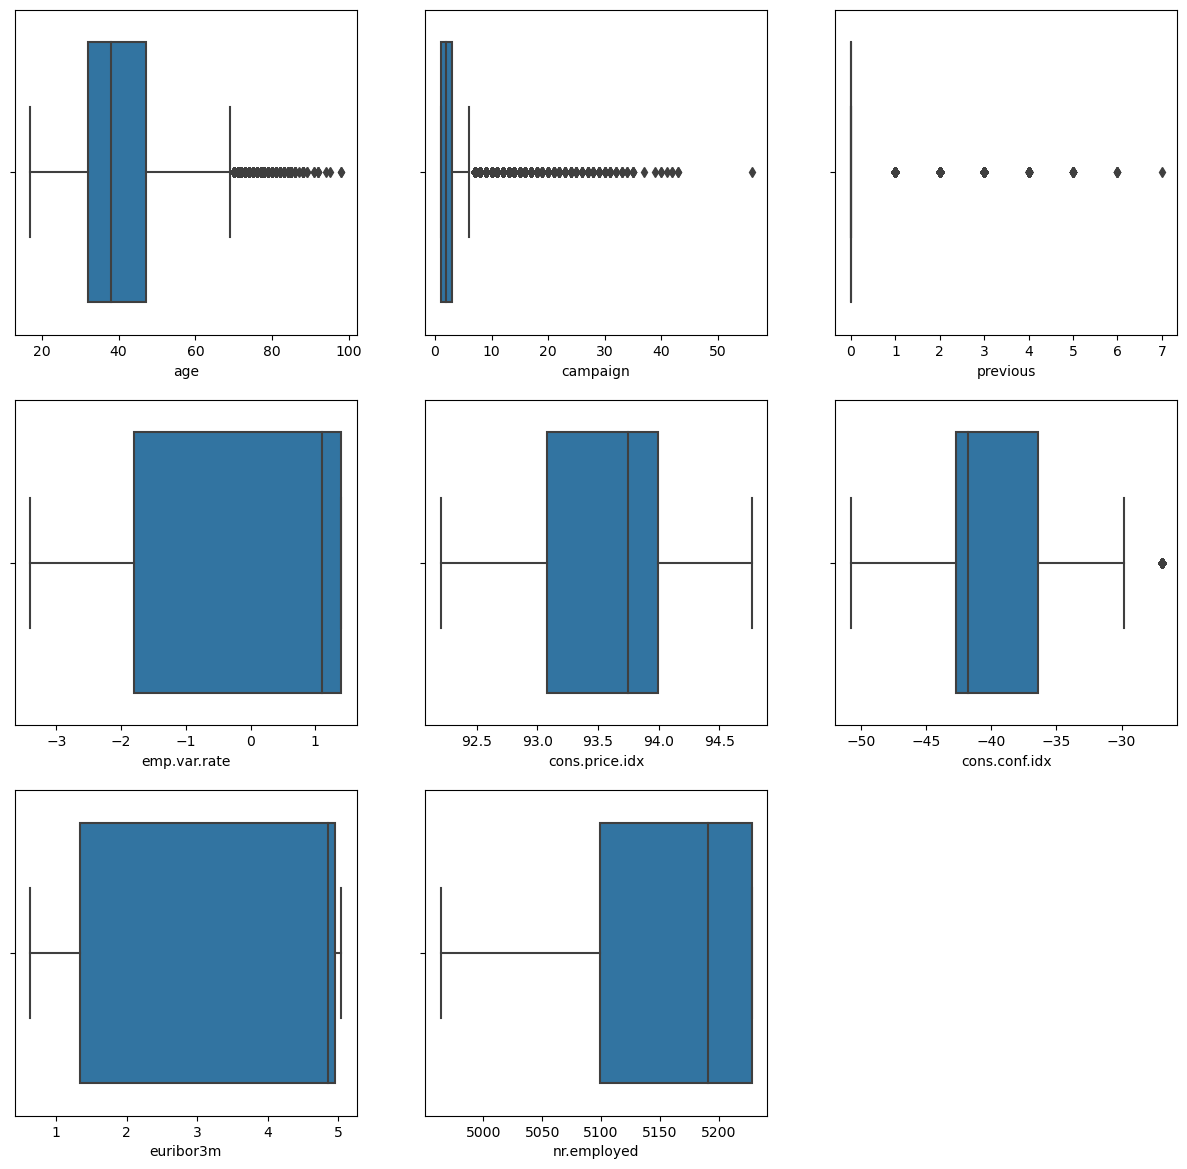

In [ ]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber=1

for i in df1:
    plt.subplot(12,3,plotnumber)
    sns.boxplot(x=df[i], data=df)
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [ ]:
 np.median(df.campaign)

2.0

In [ ]:
df.loc[df.campaign > 50, 'campaign'] = np.median(df.campaign)

## Feature Selection

In [ ]:
corr=df.corr()
corr

,age,default,housing,loan,contact,campaign,previous,poutcome,emp.var.rate,cons.price.idx,...,unknown,aug,dec,jul,jun,mar,may,nov,oct,sep
age,1.000000,0.164965,-0.001403,-0.006282,0.007021,0.004981,0.024365,0.019750,-0.000371,0.000857,...,0.001062,0.065309,0.046563,-0.043563,-0.009532,0.008390,-0.067523,0.030045,0.053008,0.040889
default,0.164965,1.000000,-0.015083,-0.004819,0.135238,0.032049,-0.102416,0.023417,0.203263,0.168073,...,-0.007742,-0.008261,-0.028816,0.037551,0.050067,-0.051178,0.066952,-0.085652,-0.060199,-0.054710
housing,-0.001403,-0.015083,1.000000,0.045765,-0.081131,-0.012086,0.020678,-0.011015,-0.059035,-0.079236,...,-0.008769,0.025678,0.006854,-0.000341,-0.053392,0.011073,-0.021894,0.031605,0.002869,0.006306
loan,-0.006282,-0.004819,0.045765,1.000000,-0.012154,0.006301,-0.003129,0.000555,0.001771,-0.005218,...,-0.000641,-0.001637,0.005804,0.015581,-0.009336,-0.005143,0.000806,-0.003524,-0.010491,-0.002009
contact,0.007021,0.135238,-0.081131,-0.012154,1.000000,0.077093,-0.212848,0.118744,0.393584,0.591474,...,-0.002543,-0.280670,-0.025449,-0.205054,0.384286,-0.061471,0.344374,-0.180678,-0.041321,-0.051879
campaign,0.004981,0.032049,-0.012086,0.006301,0.077093,1.000000,-0.079335,0.032643,0.151131,0.128074,...,0.009938,0.015277,-0.009832,0.099050,0.070646,-0.015258,-0.033524,-0.079230,-0.049286,-0.034051
previous,0.024365,-0.102416,0.020678,-0.003129,-0.212848,-0.079335,1.000000,-0.313110,-0.420489,-0.203130,...,0.009095,-0.048852,0.059557,-0.116785,-0.069905,0.072733,-0.012534,0.081050,0.127754,0.157651
poutcome,0.019750,0.023417,-0.011015,0.000555,0.118744,0.032643,-0.313110,1.000000,0.192972,0.211330,...,-0.003659,0.071734,0.018885,0.086345,0.068781,0.012381,-0.083190,-0.086552,0.009298,0.029118
emp.var.rate,-0.000371,0.203263,-0.059035,0.001771,0.393584,0.151131,-0.420489,0.192972,1.000000,0.775334,...,-0.008513,0.177895,-0.124174,0.314863,0.148653,-0.138849,-0.111356,-0.105917,-0.213706,-0.170366
cons.price.idx,0.000857,0.168073,-0.079236,-0.005218,0.591474,0.128074,-0.203130,0.211330,0.775334,1.000000,...,-0.007958,-0.192027,-0.099017,0.253303,0.445513,-0.095783,-0.057274,-0.215273,-0.092174,-0.046905


#### Heat map can be super useful when you want to see which intersections of the categorical values have a higher concentration of the data compared to the others.

<AxesSubplot:>

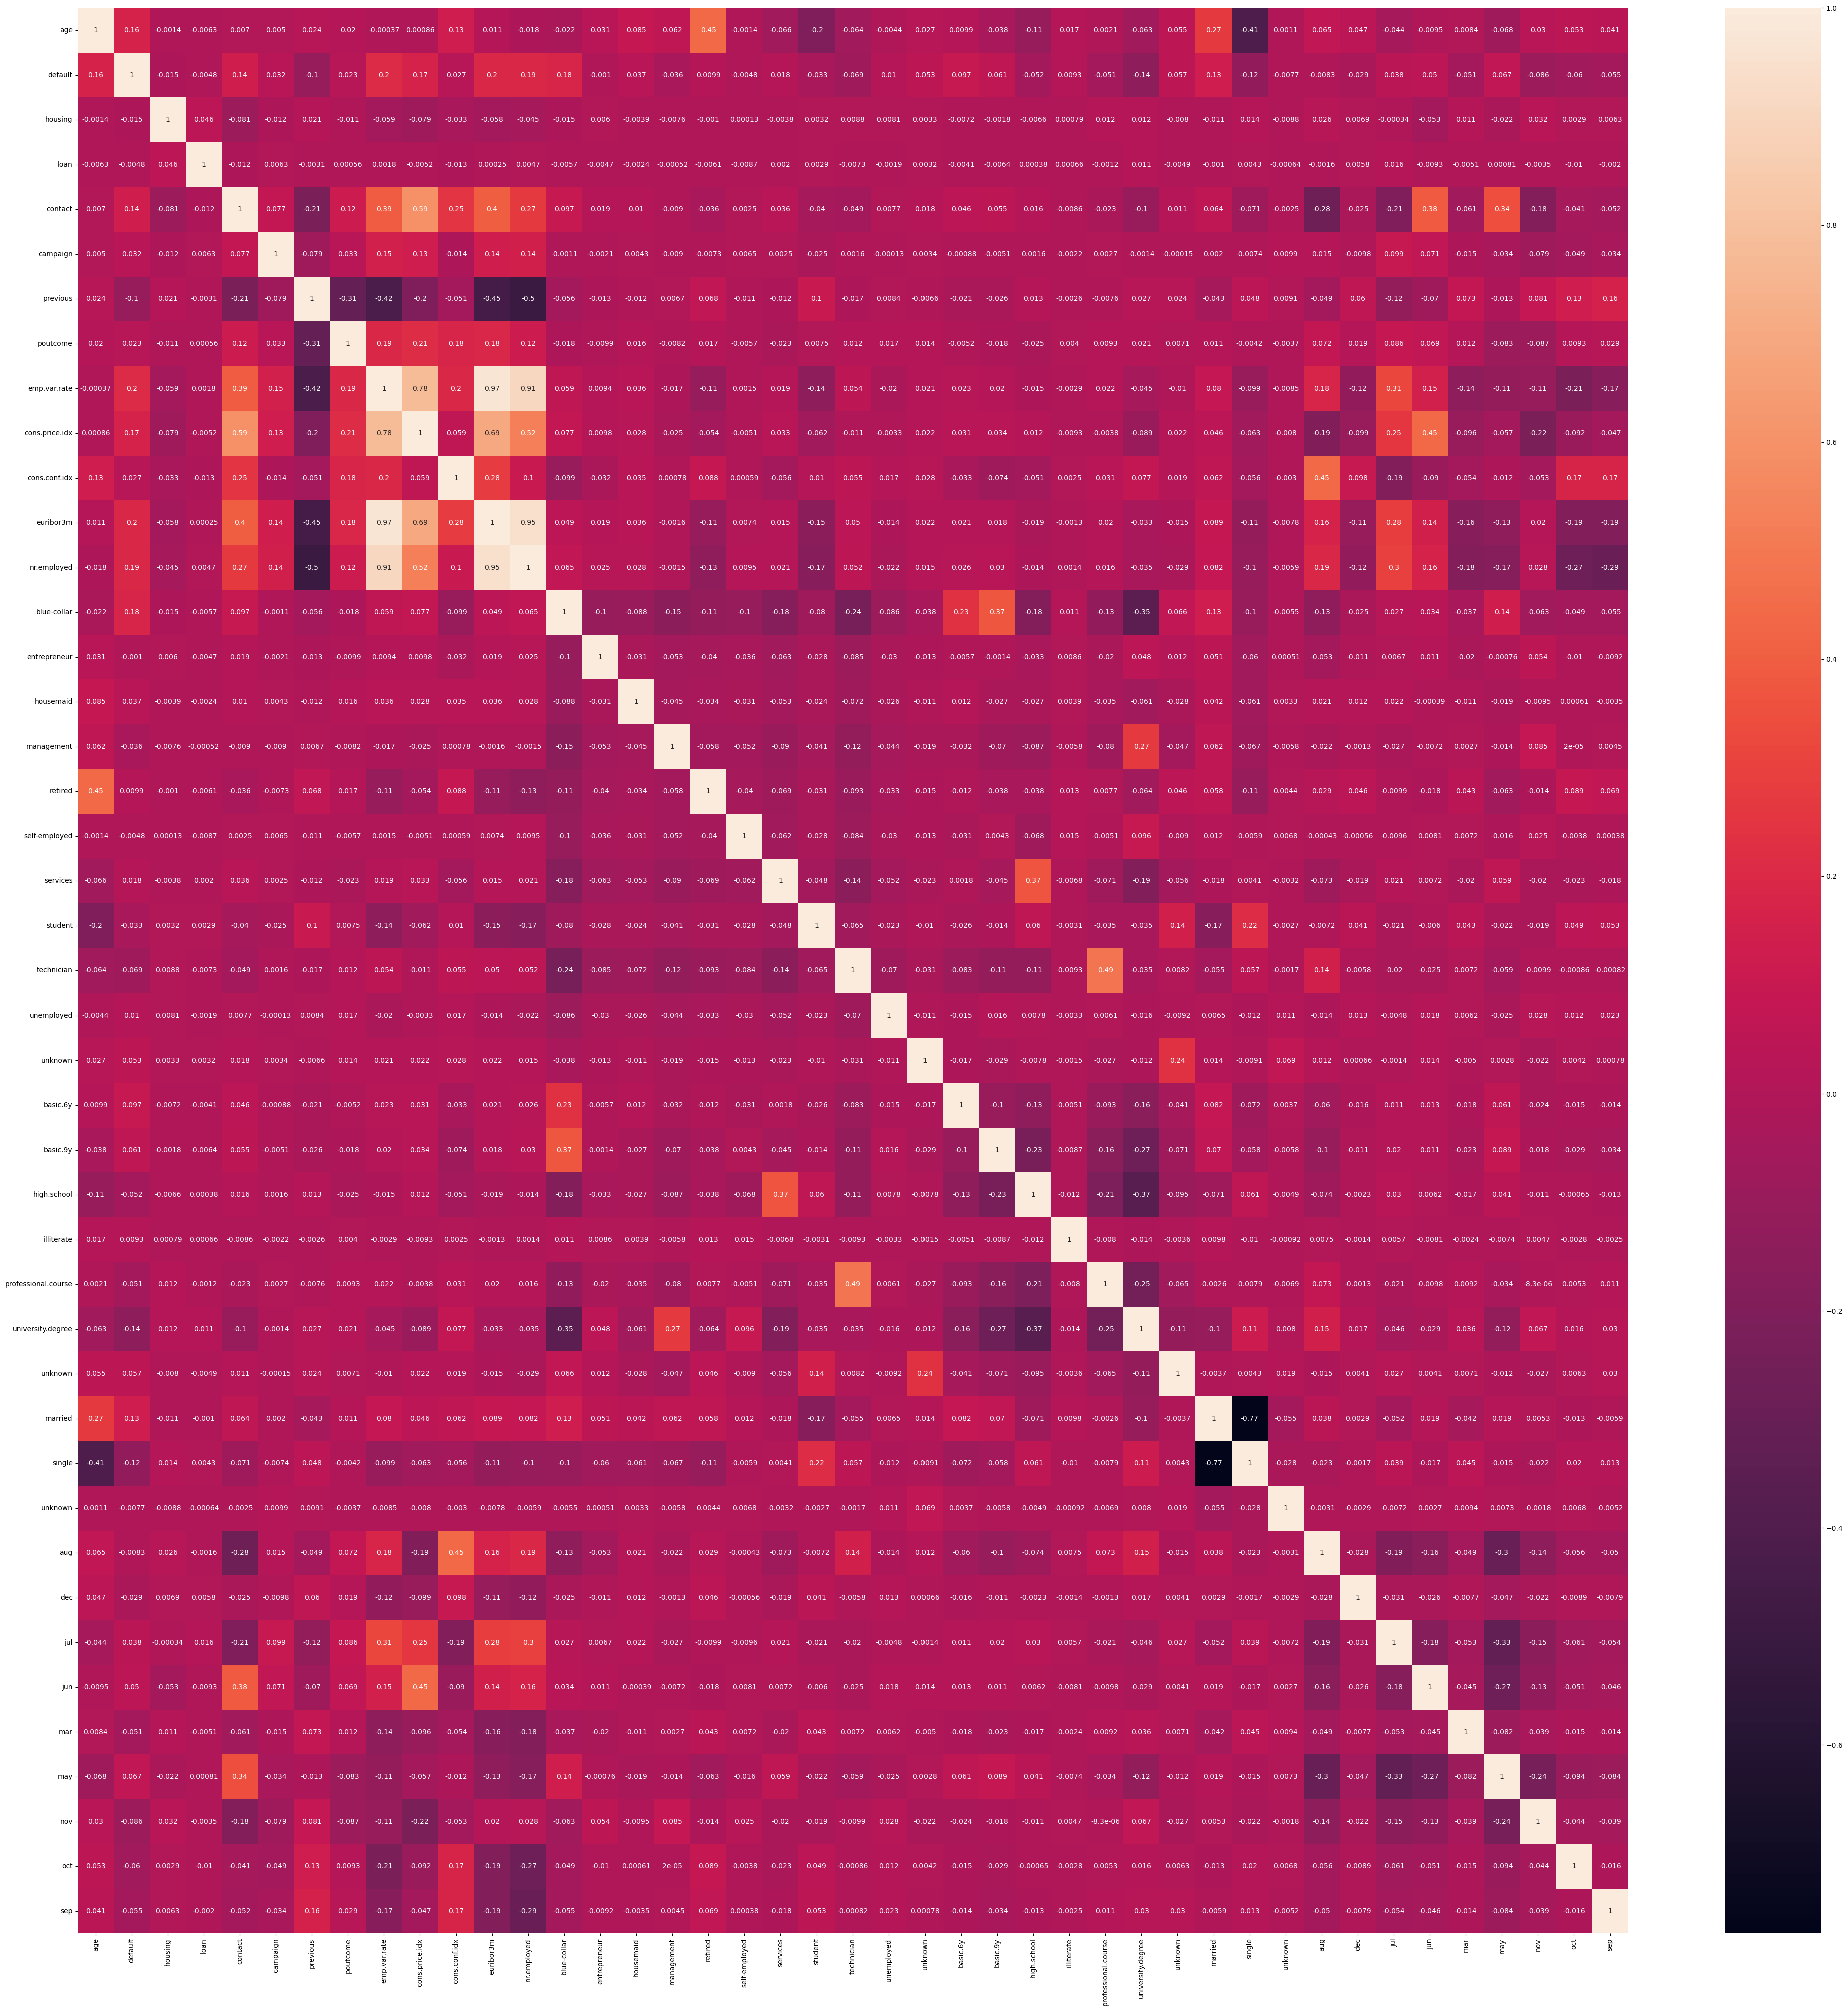

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df.drop('y',axis=1).corr(), annot =True)

#### Here features 'emp.var.rate' and 'euribor3m' are highly correlated as it can be seen from Heatmap

In [ ]:
df4 = df.drop(df[['emp.var.rate','euribor3m']] ,axis=1)

# Model Creation

    * Scaling
    * Balancing

We split the data into training and testing set, so that we can fit and evaluate a learning model. we will use the train_test_split() function from scikit-learn and use 75% data for training and 25% data for testing.

In [ ]:
x = df4.drop('y' , axis=1)
x

,age,default,housing,loan,contact,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,...,unknown,aug,dec,jul,jun,mar,may,nov,oct,sep
0,56,0,0,0,1,1,0,1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0
1,57,1,0,0,1,1,0,1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0
2,37,0,2,0,1,1,0,1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0
3,40,0,0,0,1,1,0,1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0
4,56,0,0,2,1,1,0,1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,2,0,0,1,0,1,94.767,-50.8,...,0,0,0,0,0,0,0,1,0,0
41184,46,0,0,0,0,1,0,1,94.767,-50.8,...,0,0,0,0,0,0,0,1,0,0
41185,56,0,2,0,0,2,0,1,94.767,-50.8,...,0,0,0,0,0,0,0,1,0,0
41186,44,0,0,0,0,1,0,1,94.767,-50.8,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = df.y
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

### Scaling

We use MinMaxScalar() for normalizing our data. Now our data lies between [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[0.48148148, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49382716, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24691358, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48148148, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.7037037 , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
x1 =pd.DataFrame(data= x_scaled, columns =x.columns)
x1

,age,default,housing,loan,contact,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,...,unknown,aug,dec,jul,jun,mar,may,nov,oct,sep
0,0.481481,0.0,0.0,0.0,1.0,0.000000,0.000000,0.5,0.698753,0.60251,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.5,0.0,0.0,1.0,0.000000,0.000000,0.5,0.698753,0.60251,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.0,1.0,0.0,1.0,0.000000,0.000000,0.5,0.698753,0.60251,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.0,1.0,0.000000,0.000000,0.5,0.698753,0.60251,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.0,0.0,1.0,1.0,0.000000,0.000000,0.5,0.698753,0.60251,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.0,1.0,0.0,0.0,0.000000,0.000000,0.5,1.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41184,0.358025,0.0,0.0,0.0,0.0,0.000000,0.000000,0.5,1.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,0.481481,0.0,1.0,0.0,0.0,0.023810,0.000000,0.5,1.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.5,1.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y, test_size=0.25, random_state=42)

In [ ]:
x_train

,age,default,housing,loan,contact,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,...,unknown,aug,dec,jul,jun,mar,may,nov,oct,sep
549,0.407407,0.5,1.0,0.0,1.0,0.000000,0.000000,0.5,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1974,0.111111,0.0,0.0,0.0,1.0,0.071429,0.000000,0.5,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20992,0.209877,0.0,1.0,0.0,0.0,0.047619,0.000000,0.5,0.484412,0.615063,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1730,0.160494,0.0,1.0,0.0,1.0,0.000000,0.000000,0.5,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26913,0.148148,0.0,1.0,0.0,0.0,0.023810,0.000000,0.5,0.389322,0.368201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.506173,0.5,0.0,0.0,1.0,0.023810,0.000000,0.5,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11284,0.246914,0.0,0.0,0.0,1.0,0.000000,0.000000,0.5,0.882307,0.376569,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38158,0.222222,0.0,1.0,0.0,0.0,0.000000,0.142857,1.0,0.089634,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.283951,0.0,1.0,0.0,1.0,0.023810,0.000000,0.5,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_train

549      0
1974     0
20992    0
1730     0
26913    0
        ..
6265     0
11284    0
38158    1
860      0
15795    0
Name: y, Length: 30891, dtype: int32

In [ ]:
x_test

,age,default,housing,loan,contact,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,...,unknown,aug,dec,jul,jun,mar,may,nov,oct,sep
32884,0.493827,0.0,0.0,1.0,0.0,0.000000,0.142857,0.0,0.269680,0.192469,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3169,0.469136,0.5,1.0,0.0,1.0,0.023810,0.000000,0.5,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32206,0.197531,0.0,0.0,0.0,0.0,0.000000,0.142857,0.0,0.269680,0.192469,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9403,0.234568,0.0,0.0,0.0,1.0,0.071429,0.000000,0.5,0.882307,0.376569,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14020,0.123457,0.0,1.0,0.0,0.0,0.023810,0.000000,0.5,0.669135,0.338912,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35087,0.296296,0.5,1.0,0.0,0.0,0.095238,0.000000,0.5,0.269680,0.192469,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12883,0.333333,0.5,1.0,1.0,0.0,0.023810,0.000000,0.5,0.669135,0.338912,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3588,0.271605,0.0,0.0,0.0,1.0,0.000000,0.000000,0.5,0.698753,0.602510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31192,0.358025,0.0,0.0,0.0,0.0,0.023810,0.142857,0.0,0.269680,0.192469,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_test

32884    0
3169     0
32206    0
9403     0
14020    0
        ..
35087    0
12883    0
3588     0
31192    0
1937     0
Name: y, Length: 10297, dtype: int32

# Model Evaluation

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, classification_report, recall_score

In [ ]:
accuracy_score(y_pred, y_test)

0.8987083616587356

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9144
           1       0.64      0.22      0.32      1153

    accuracy                           0.90     10297
   macro avg       0.77      0.60      0.63     10297
weighted avg       0.88      0.90      0.88     10297



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[9004  140]
 [ 903  250]]


Accuracy score is the percentage of correct predictions out of all predictions made. The LR algorithm achieves an accuracy of 89.86%, suggesting high level of strength of this model to classify the customer response given all the defined customer features.

Classification report shows the precision, recall, F1 and support scores for the LR classification model.

Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 91%.
Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 98% that they would decline the offer.
In general, the report shows that LR model has great predictive power to identify the customers who would not subscribe to the term deposit. However, because of the limited number of clients accepting the term deposit, there is a need for stratified sampling or rebalancing to deal with this structural weakness before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.

## SMV

our data is imbalanced. We can see that in our dataset, the positive samples (minority class) are much less than negative samples (majority class). The positive samples (the people who subscribed to the term deposit) were only 11% from the total samples. Therefore, accuracy is no longer a good measure of performance because if we simply predict all examples to the negative class, we achieve 89% accuracy. As a result, we need to apply methods to overcome class imbalance problem. to overcome this,we use SMOTE method to balance our dataset.

In [ ]:
y_train.value_counts()

0    27404
1     3487
Name: y, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_smote))

Counter({0: 27404, 1: 3487})
Counter({0: 27404, 1: 27404})


In [ ]:
from sklearn.svm import SVC
svc =SVC()

In [ ]:
svc.fit(x_smote,y_smote)

SVC()

In [ ]:
y_predicted = svc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predicted)

0.8552976595124794

In [ ]:
print(confusion_matrix(y_test, y_predicted))

[[8237  907]
 [ 583  570]]


In [ ]:
f1 = f1_score(y_test, y_predicted)
f1

0.43346007604562736

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      9144
           1       0.39      0.49      0.43      1153

    accuracy                           0.86     10297
   macro avg       0.66      0.70      0.68     10297
weighted avg       0.87      0.86      0.86     10297



## Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(svc, x , y, scoring= 'f1', cv= 3)
print(scores)

[0.         0.         0.23278911]


In [ ]:
np.mean(scores)  #this % of confident earlier not exactly sure on %

0.07759636846989192

In [ ]:
np.std(scores)

0.10973783668102115

## Hyperparameter tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
tuned_param = {'C' : [0.1], 'gamma' : [1]}

In [ ]:
random = RandomizedSearchCV(svc, tuned_param, scoring = 'f1', verbose = 3)

In [ ]:
random.fit(x_smote,y_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.751 total time= 5.6min
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.751 total time= 6.2min
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.756 total time= 6.2min
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.758 total time= 6.2min
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.758 total time= 5.7min


RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1], 'gamma': [1]}, scoring='f1',
                   verbose=3)

In [ ]:
print(random.best_params_)

{'gamma': 1, 'C': 0.1}


In [ ]:
clf=SVC(gamma= 1, C= 0.1,random_state=1)

In [ ]:
clf.fit(x_smote, y_smote)

SVC(C=0.1, gamma=1, random_state=1)

In [ ]:
y_clf=clf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      9144
           1       0.31      0.55      0.39      1153

    accuracy                           0.81     10297
   macro avg       0.62      0.70      0.64     10297
weighted avg       0.87      0.81      0.83     10297



In [ ]:
print(confusion_matrix(y_test, y_clf))

[[7722 1422]
 [ 521  632]]


In [ ]:
#confusion matrix in pandas is crosstab
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
y,,
0,7722,1422
1,521,632


In [ ]:
scores_after = cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())

[0. 0. 0.]
Cross validation Score: 0.0
Std : 0.10973783668102115


# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [ ]:
y_hat=dt.predict(x_test)
y_hat

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
y_train_predict = dt.predict(x_train)
y_train_predict

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_train_predict_sm = dt.predict(x_smote)
y_train_predict_sm

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
acc_train = accuracy_score(y_train, y_train_predict)
acc_train

0.9876015667993914

In [ ]:
acc_train_sm = accuracy_score(y_smote, y_train_predict_sm)#checking accuracy
acc_train_sm

0.9929207414975916

In [ ]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27404
           1       0.99      0.90      0.94      3487

    accuracy                           0.99     30891
   macro avg       0.99      0.95      0.97     30891
weighted avg       0.99      0.99      0.99     30891



In [ ]:
test_acc=accuracy_score(y_test,y_hat)#testing accuracy
test_acc

0.8385937651743226

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9144
           1       0.30      0.33      0.32      1153

    accuracy                           0.84     10297
   macro avg       0.61      0.62      0.61     10297
weighted avg       0.85      0.84      0.84     10297



to overcome this overfitting need to come across hyperparameter tuning

### Hyperparameter tunning for decision tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":[20],
    "min_samples_split":[5],
    "min_samples_leaf":list(range(1, 5)),
}

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=3, cv=3)

In [ ]:
tree_cv.fit(x_smote,y_smote)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [5],
                         'splitter': ('best', 'random')},
             scoring='recall', verbose=3)

In [ ]:
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'})


In [ ]:
Bestparamters: ({'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'})

In [ ]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
tree_cv.best_score_

0.8680149196258014

In [ ]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf= 1, min_samples_split= 5, splitter= 'best')#passing best parameter to decision tree

In [ ]:
dt1.fit(x_smote, y_smote)

DecisionTreeClassifier(max_depth=20, min_samples_split=5)

In [ ]:
y_hat1 = dt1.predict(x_test)
y_hat1

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      9144
           1       0.36      0.32      0.34      1153

    accuracy                           0.86     10297
   macro avg       0.64      0.62      0.63     10297
weighted avg       0.85      0.86      0.86     10297



In [ ]:
y_pred_train  = dt1.predict(x_train)

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27404
           1       0.80      0.65      0.72      3487

    accuracy                           0.94     30891
   macro avg       0.88      0.82      0.84     30891
weighted avg       0.94      0.94      0.94     30891



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)   #object creation ,taking  decision tree in random forest
rfc.fit(x_smote,y_smote)

RandomForestClassifier()

In [ ]:
y_pre =rfc.predict(x_test)   #testing

In [ ]:
accuracy_score(y_test,y_pre)

0.8694765465669613

In [ ]:
f1_score(y_test,y_pre)

0.3713751169317119

In [ ]:
precision_score(y_test,y_pre)

0.4030456852791878

In [ ]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9144
           1       0.40      0.34      0.37      1153

    accuracy                           0.87     10297
   macro avg       0.66      0.64      0.65     10297
weighted avg       0.86      0.87      0.86     10297



In [ ]:
y_train_pre = rfc.predict(x_train)

In [ ]:
print(classification_report(y_train,y_train_pre))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     27404
           1       0.96      0.93      0.94      3487

    accuracy                           0.99     30891
   macro avg       0.98      0.96      0.97     30891
weighted avg       0.99      0.99      0.99     30891



# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [128]
max_features = ['auto', 'sqrt']
max_depth = [5]
min_samples_split = [2, 5]
min_samples_leaf = [1]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [ ]:
rf_clf1 = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rf_cv.fit(x_smote, y_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [128]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Best paramters: {'n_estimators': 128, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True})


In [ ]:
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(x_smote, y_smote)

RandomForestClassifier()

In [ ]:
y_predict=rf_clf2.predict(x_test)

In [ ]:
f1 = f1_score(y_test,y_predict)
f1

0.36981132075471695

In [ ]:
y_predict_train = rf_clf2.predict(x_train)

In [ ]:
f1_train = f1_score(y_train, y_predict_train)
f1_train

0.9440630933255441

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9144
           1       0.41      0.34      0.37      1153

    accuracy                           0.87     10297
   macro avg       0.66      0.64      0.65     10297
weighted avg       0.86      0.87      0.87     10297



# Model Comparison Report

* Logistic Regression
  The Logistic regression is performing well, and giving accuracy score as 89%. However, the result of accuracy score can possibly yield misleading result if the data set is unbalanced, because the number of observations in different classes largely vary.Precision is 64%, recall-score 22% , f1-score-32%.
  
* SVM
  Support Vector Machine is giving accuracy score as 86%.As we are considering f1-score to compare models so,precision score of SMV is 39%, recall-score is 49%, f1 score is 43%.
  After tunning precision is 31%, recall-score is 55%, f1 score is 39% and accuracy score is 81%.
  

* Decision Tree
  Accuracy score of decision tree is 84%, precision is 30%, recall score is 33%,f1-score is 32%.after tunning accuracy score is 86%, precision is 36%, recall-score is 32%, f1 score is 34%.
  
  
* Random Forest Classifier
  Accuracy score of RFC is 87%, precision is 40%, recall score is 34%, f1-score is 37%. Even after tunning accuracy  is 87%, precision is 41%, recall score is 34%, f1-score is 37% same.

####  SVM is considered as best model because recall-score and f1-score of it is more as compared with the other models.


# Report on Challenges faced
  * Its an imbalanced data set so, need to fix that using following steps like smoting. Accuracy score is not a good evaluation matrix for imbalanced data set so, go through the confusion matrix and hyperparamter tunning for a better result.
  * In SVM model it takes lots of time to fit a smote values